In [14]:
from matplotlib import pyplot as plt
from tueplots import bundles
import numpy as np
from matplotlib.patches import Ellipse
import seaborn as sns
import sys
sys.path.append("../")
from src import data, pca

In [49]:
plt.rcParams.update(bundles.neurips2021(usetex=True))

In [10]:
pop_songs, non_pop_songs = data.get_split_dfs(drop_columns=['popularity', 'key', 'id', 'name'])

In [11]:
dat_pca = pop_songs.append(non_pop_songs)
dat_pca = dat_pca.dropna()

In [12]:
eigenvalues, eigenvectors = pca.PCA(dat_pca)

In [13]:
dat_pca_z = (dat_pca-dat_pca.mean(axis=0)) / dat_pca.std(axis=0)


pop_proj = np.asarray(dat_pca_z)[:70,] @ eigenvectors[:,:2]
non_pop_proj = np.asarray(dat_pca_z)[70:,] @ eigenvectors[:,:2]

pc1 = eigenvalues[0] * eigenvectors[:,0]
pc2 = eigenvalues[1] * eigenvectors[:,1]

In [29]:
colors = sns.color_palette("muted")
colors2 = sns.color_palette()
colors

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [24]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

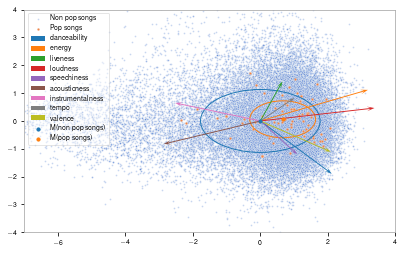

In [53]:
plt.figure()
plt.xlim(-7, 4)
plt.ylim(-4, 4)

# plot data points
s = 3
sns.scatterplot(x=non_pop_proj[:,0], y=non_pop_proj[:,1], s=s, color=(*colors[0], 0.3), label="Non pop songs")
sns.scatterplot(x=pop_proj[:,0], y=pop_proj[:,1], s=2*s, color=(*colors[1], 1), label="Pop songs")

# add mahalanobis unit circle per group
non_pop_mean = np.mean(non_pop_proj, axis=0)
pop_mean = np.mean(pop_proj, axis=0)

ax = plt.gca()
pop_var = np.std(pop_proj, axis=0)
ax.add_patch(Ellipse((pop_mean[0], pop_mean[1]),2*pop_var[0],2*pop_var[1], facecolor='none', edgecolor=colors2[1]))
non_pop_var = np.std(non_pop_proj, axis=0)
ax.add_patch(Ellipse((non_pop_mean[0], non_pop_mean[1]),2*non_pop_var[0],2*non_pop_var[1], facecolor='none', edgecolor=colors2[0]))

# plot PCs
num_vecs = pc1.shape[0]
Q = [0] * num_vecs
for i in range(num_vecs):
    Q[i] = plt.quiver(0, 0, pc1[i], pc2[i], scale=5, headwidth=5, headlength=8, width=0.0025, label=f'{pop_songs.columns[i]}', color=plt.cm.tab10.colors[i])

# plot Means

plt.scatter(*non_pop_mean, color=colors2[0], marker="o", s=10, label="M(non pop songs)")
plt.scatter(*pop_mean, color=colors2[1], marker="o", s=10, label="M(pop songs)")

ax.spines['top'].set_color('#aaa')
ax.spines['right'].set_color('#aaa')
ax.spines['bottom'].set_color('#aaa')
ax.spines['left'].set_color('#aaa')

# add legend
plt.legend(framealpha=0.5)

plt.savefig("001_pca.pdf")
plt.show()
